In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Load the dataset
df = pd.read_csv('16k_Movies.csv')

# Display the first 5 rows
print(df.head())

# Get the shape of the dataset
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.')

# Get a summary of the dataset
df.info()

# Data Cleaning and Preprocessing

# Renaming Columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handling Missing Values
print("Missing values:")
print(df.isnull().sum())

   Unnamed: 0                     Title  Release Date  \
0           0            Dekalog (1988)  Mar 22, 1996   
1           1         Three Colors: Red  Nov 23, 1994   
2           2            The Conformist  Oct 22, 1970   
3           3               Tokyo Story  Mar 13, 1972   
4           4  The Leopard (re-release)  Aug 13, 2004   

                                         Description  Rating  \
0  This masterwork by Krzysztof Kieślowski is one...     7.4   
1  Krzysztof Kieslowski closes his Three Colors t...     8.3   
2  Set in Rome in the 1930s, this re-release of B...     7.3   
3  Yasujiro Ozu’s Tokyo Story follows an aging co...     8.1   
4  Set in Sicily in 1860, Luchino Visconti's spec...     7.8   

  No of Persons Voted           Directed by  \
0                 118  Krzysztof Kieslowski   
1                 241  Krzysztof Kieslowski   
2                 106   Bernardo Bertolucci   
3                 147          Yasujirô Ozu   
4                  85      Luchino Vi

In [77]:
# Function to convert duration string to hours
def duration_to_hours(duration_str):
    if pd.isna(duration_str):
        return np.nan
    
    # Use regex to extract hours and minutes
    match = re.search(r'(\d+)\s*h(?:\s*(\d+)\s*m)?', duration_str)
    if match:
        hours = int(match.group(1))
        minutes = int(match.group(2) or 0)
        return hours + minutes / 60
    
    # If no match, try to extract just minutes
    match = re.search(r'(\d+)\s*m', duration_str)
    if match:
        minutes = int(match.group(1))
        return minutes / 60
    
    # If still no match, return NaN
    return np.nan

In [78]:
# Renaming Columns
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Handling Missing Values
print("\nMissing values:")
print(df.isnull().sum())

# Check data types and unique values
for column in df.columns:
    print(f"\nColumn: {column}")
    print(f"Data type: {df[column].dtype}")
    print(f"Sample values: {df[column].head().tolist()}")

# Converting Data Types
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['no_of_persons_voted'] = pd.to_numeric(df['no_of_persons_voted'], errors='coerce')
df['duration'] = df['duration'].apply(duration_to_hours)

# Extracting Year from Release Date
df['year'] = df['release_date'].dt.year

# Handling Features
df['genres'] = df['genres'].str.split(',')
df['directed_by'] = df['directed_by'].str.split(',')
df['written_by'] = df['written_by'].str.split(',')

# Remove rows with NaN values in 'duration', 'rating', or 'year'
df_clean = df.dropna(subset=['duration', 'rating', 'year'])

print("\nClean dataset info:")
print(df_clean.info())

# Display summary statistics
print("\nSummary statistics for duration, rating, and year:")
print(df_clean[['duration', 'rating', 'year']].describe())

genres_exploded = df_clean.explode('genres')
genre_counts = genres_exploded['genres'].value_counts()

# Ensure we have a 'primary_genre' column (first genre listed for each movie)
df['primary_genre'] = df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown')

# Get the top 10 genres for coloring
top_genres = df['primary_genre'].value_counts().nlargest(10).index.tolist()

# Create a color palette for the top genres
palette = sns.color_palette("husl", n_colors=len(top_genres))
color_dict = dict(zip(top_genres, palette))



Missing values:
unnamed:_0                0
title                     0
release_date              0
description               0
rating                 3444
no_of_persons_voted    3461
directed_by               7
written_by              963
duration                 13
genres                    5
dtype: int64

Column: unnamed:_0
Data type: int64
Sample values: [0, 1, 2, 3, 4]

Column: title
Data type: object
Sample values: ['Dekalog (1988)', 'Three Colors: Red', 'The Conformist', 'Tokyo Story', 'The Leopard (re-release)']

Column: release_date
Data type: object
Sample values: ['Mar 22, 1996', 'Nov 23, 1994', 'Oct 22, 1970', 'Mar 13, 1972', 'Aug 13, 2004']

Column: description
Data type: object
Sample values: ['This masterwork by Krzysztof Kieślowski is one of the twentieth century’s greatest achievements in visual storytelling. Originally made for Polish television, Dekalog focuses on the residents of a housing complex in late-Communist Poland, whose lives become subtly intertwined as t

In [79]:
# Check for outliers
Q1 = df_clean['duration'].quantile(0.25)
Q3 = df_clean['duration'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df_clean[(df_clean['duration'] >= lower_bound) & (df_clean['duration'] <= upper_bound)]

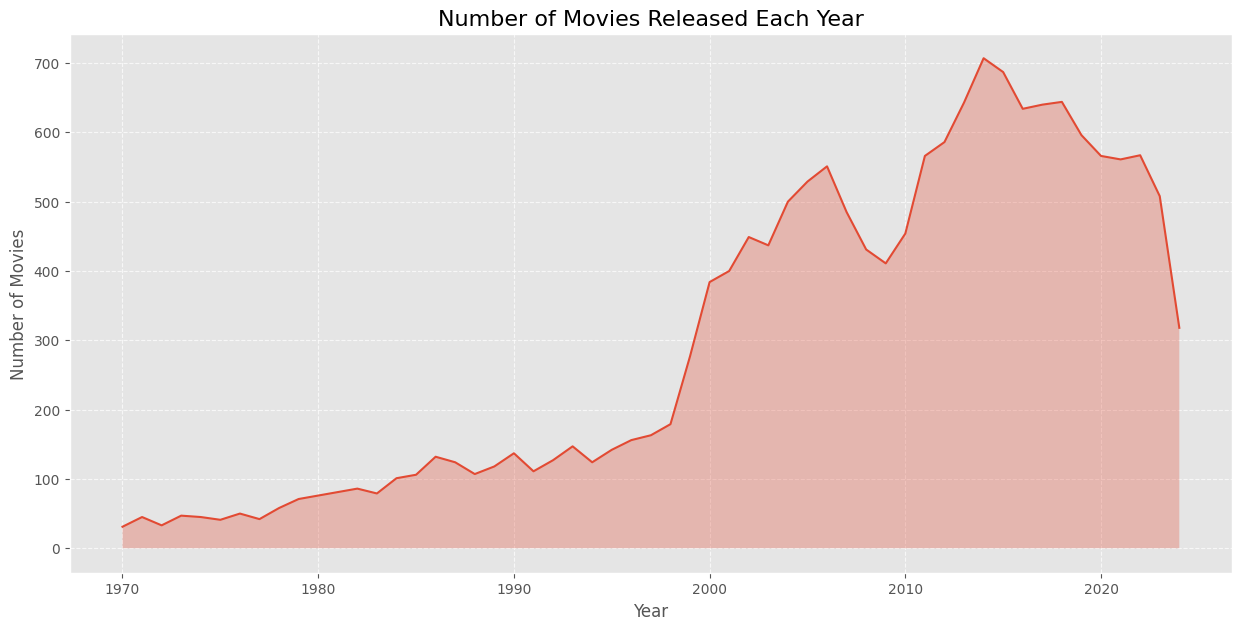

In [80]:
# Number of Movies Released Each Year
movies_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(15, 7))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.fill_between(movies_per_year.index, movies_per_year.values, alpha=0.3)
plt.title('Number of Movies Released Each Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

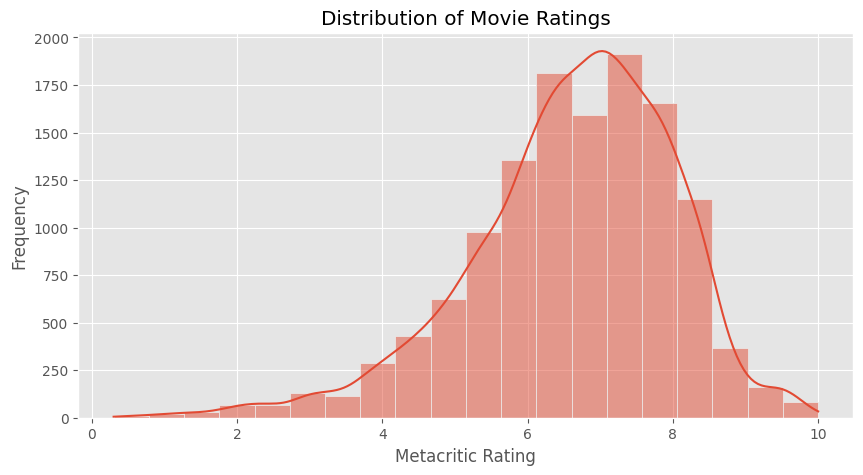

In [81]:
# Distribution of Ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'].dropna(), bins=20, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Metacritic Rating')
plt.ylabel('Frequency')
plt.show()

/tmp/ipykernel_111680/3664310383.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='Set2', capsize=0.2, errwidth=2)
/tmp/ipykernel_111680/3664310383.py:3: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 2}` instead.

  ax = sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='Set2', capsize=0.2, errwidth=2)


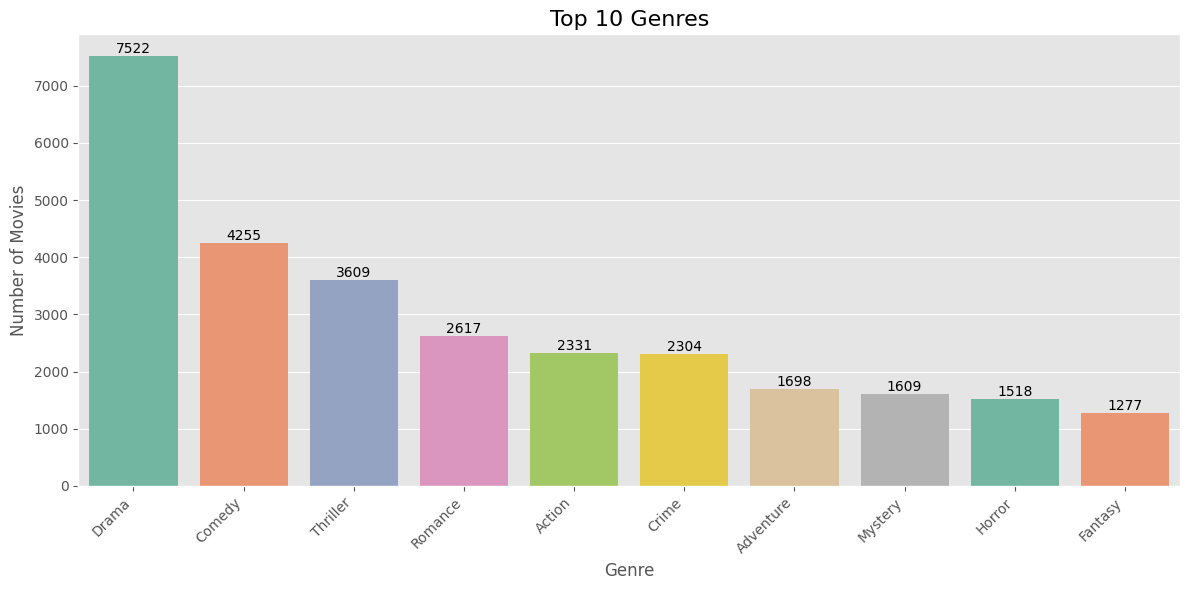

In [82]:
# Plot the top 10 genres with distinct colors
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=genre_counts.index[:10], y=genre_counts.values[:10], palette='Set2', capsize=0.2, errwidth=2)

# Add title and labels
plt.title('Top 10 Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

# Rotate x-tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Annotate the bars with the counts
for i, v in enumerate(genre_counts.values[:10]):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Show the plot with tight layout
plt.tight_layout()
plt.show()

<Figure size 1500x700 with 0 Axes>

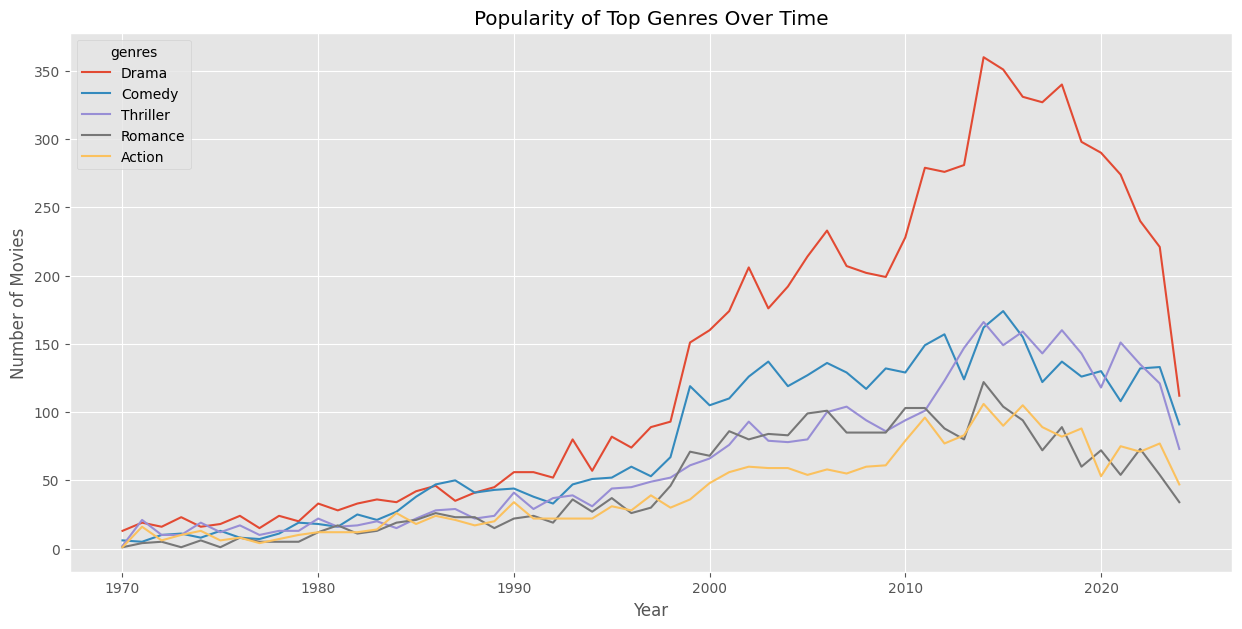

In [83]:
# Popularity of Top Genres Over Time
genre_year = genres_exploded.groupby(['year', 'genres']).size().reset_index(name='count')
genre_pivot = genre_year.pivot(index='year', columns='genres', values='count').fillna(0)
top_genres = genre_counts.index[:5]
genre_pivot_top = genre_pivot[top_genres]

plt.figure(figsize=(15, 7))
genre_pivot_top.plot(kind='line', figsize=(15,7))
plt.title('Popularity of Top Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

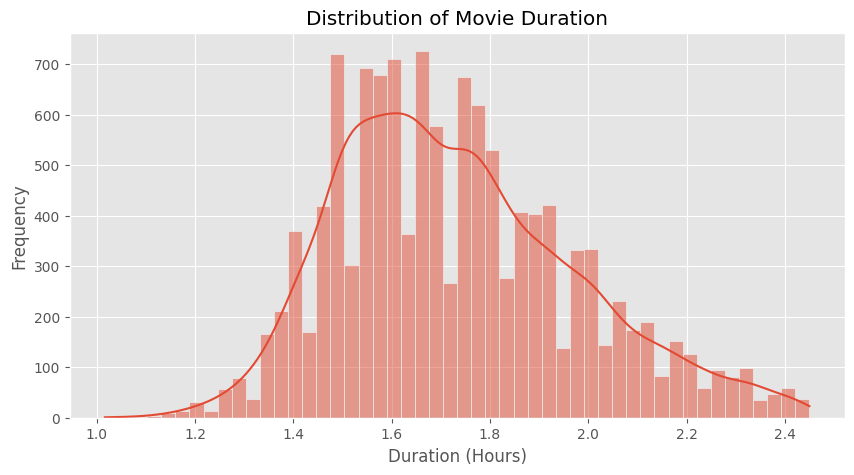

In [84]:
# Distribution of Duration
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['duration'], bins=50, kde=True)
plt.title('Distribution of Movie Duration')
plt.xlabel('Duration (Hours)')
plt.ylabel('Frequency')
plt.show()

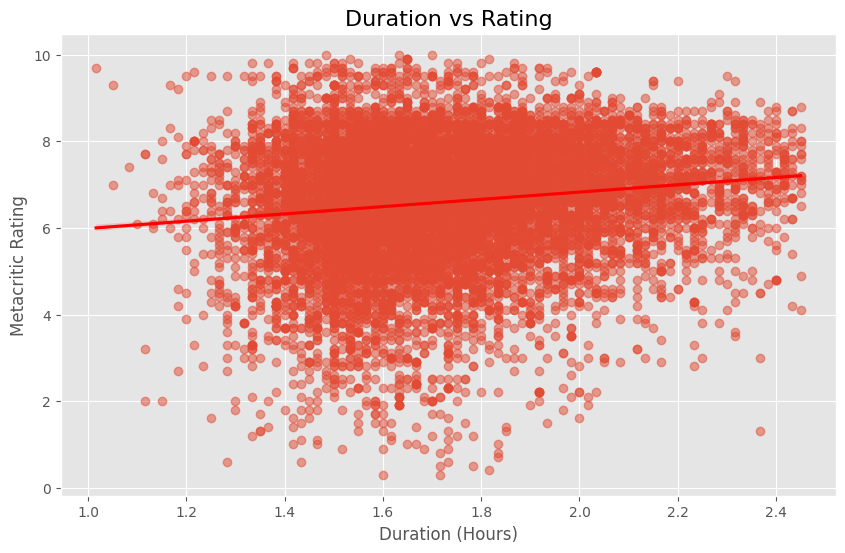

The correlation between duration and rating is 0.15


In [85]:
# Correlation Between Duration and Rating
plt.figure(figsize=(10, 6))
sns.regplot(x='duration', y='rating', data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Duration vs Rating', fontsize=16)
plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Metacritic Rating', fontsize=12)
plt.show()

correlation = df_clean['duration'].corr(df_clean['rating'])
print(f'The correlation between duration and rating is {correlation:.2f}')


/tmp/ipykernel_111680/1424016520.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.index[:10], y=director_counts.values[:10], palette='Set2')


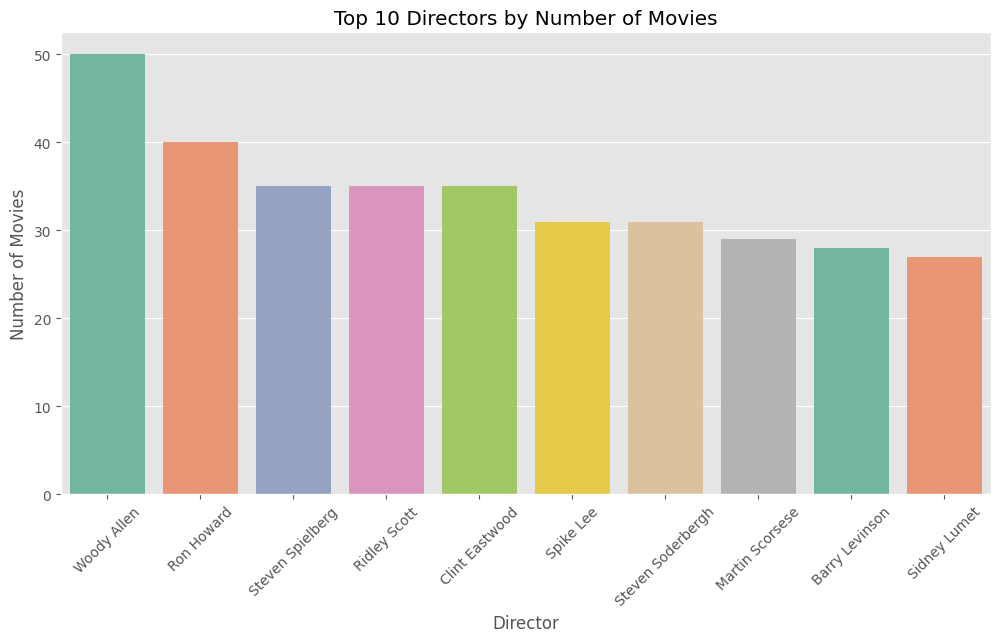

In [86]:
# Top 10 Directors by Number of Movies
directors_exploded = df.explode('directed_by')
director_counts = directors_exploded['directed_by'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=director_counts.index[:10], y=director_counts.values[:10], palette='Set2')
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_111680/1915120602.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_director_ratings.index[:10], y=top_director_ratings.values[:10], palette='Set2')


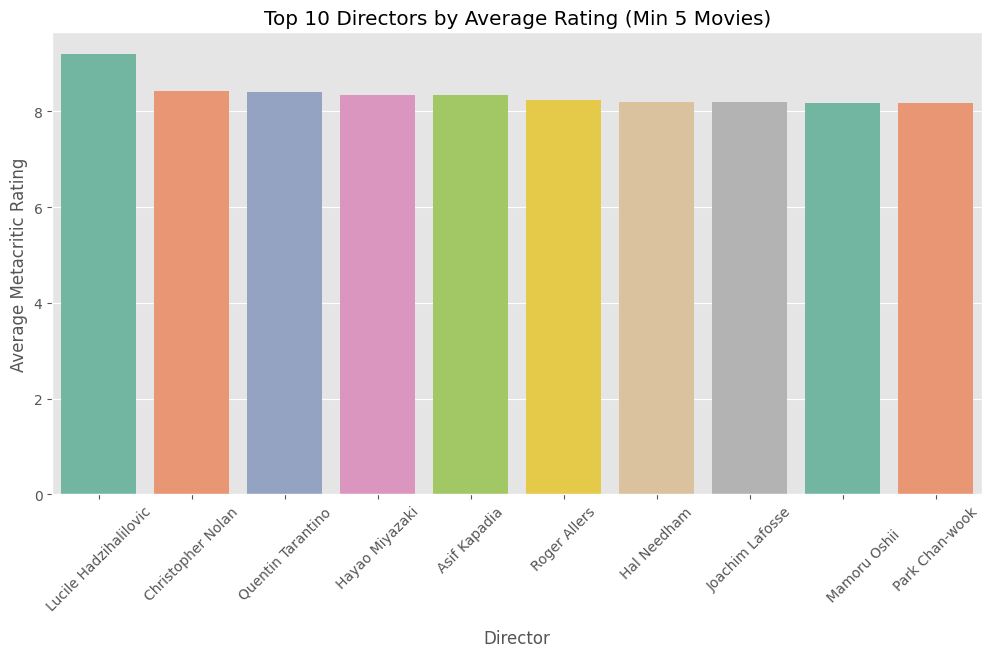

In [87]:
# Directors with Highest Average Ratings (Minimum 5 Movies)
director_ratings = directors_exploded.groupby('directed_by')['rating'].mean()
director_movie_counts = directors_exploded['directed_by'].value_counts()
top_directors = director_movie_counts[director_movie_counts >= 5].index
top_director_ratings = director_ratings.loc[top_directors].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_director_ratings.index[:10], y=top_director_ratings.values[:10], palette='Set2')
plt.title('Top 10 Directors by Average Rating (Min 5 Movies)')
plt.xlabel('Director')
plt.ylabel('Average Metacritic Rating')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_111680/1646398229.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=writer_counts.index[:10], y=writer_counts.values[:10], palette='Set2')


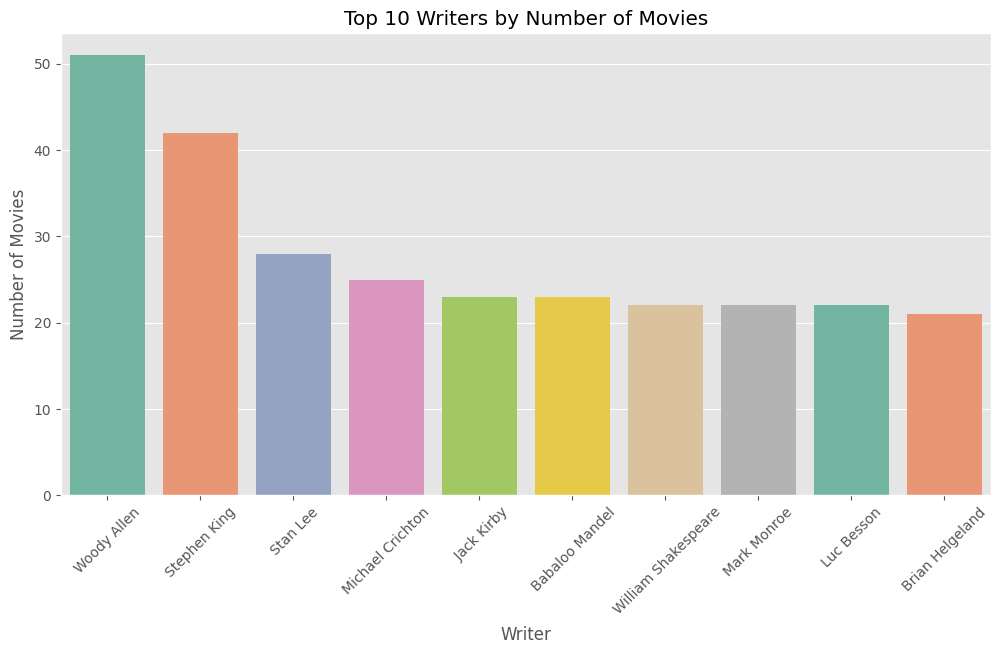

In [88]:
# Top 10 Writers by Number of Movies
writers_exploded = df.explode('written_by')
writer_counts = writers_exploded['written_by'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=writer_counts.index[:10], y=writer_counts.values[:10], palette='Set2')
plt.title('Top 10 Writers by Number of Movies')
plt.xlabel('Writer')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_111680/299724459.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_writer_ratings.index[:10], y=top_writer_ratings.values[:10], palette='Set2')


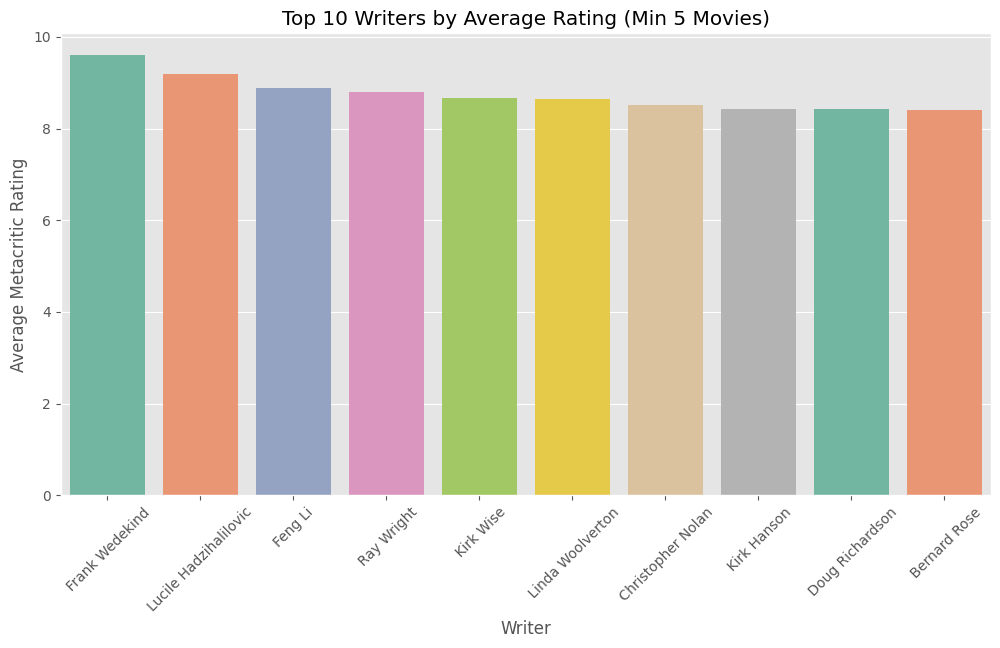

In [89]:
# Writers with Highest Average Ratings (Minimum 5 Movies)
writer_ratings = writers_exploded.groupby('written_by')['rating'].mean()
writer_movie_counts = writers_exploded['written_by'].value_counts()
top_writers = writer_movie_counts[writer_movie_counts >= 5].index
top_writer_ratings = writer_ratings.loc[top_writers].sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_writer_ratings.index[:10], y=top_writer_ratings.values[:10], palette='Set2')
plt.title('Top 10 Writers by Average Rating (Min 5 Movies)')
plt.xlabel('Writer')
plt.ylabel('Average Metacritic Rating')
plt.xticks(rotation=45)
plt.show()

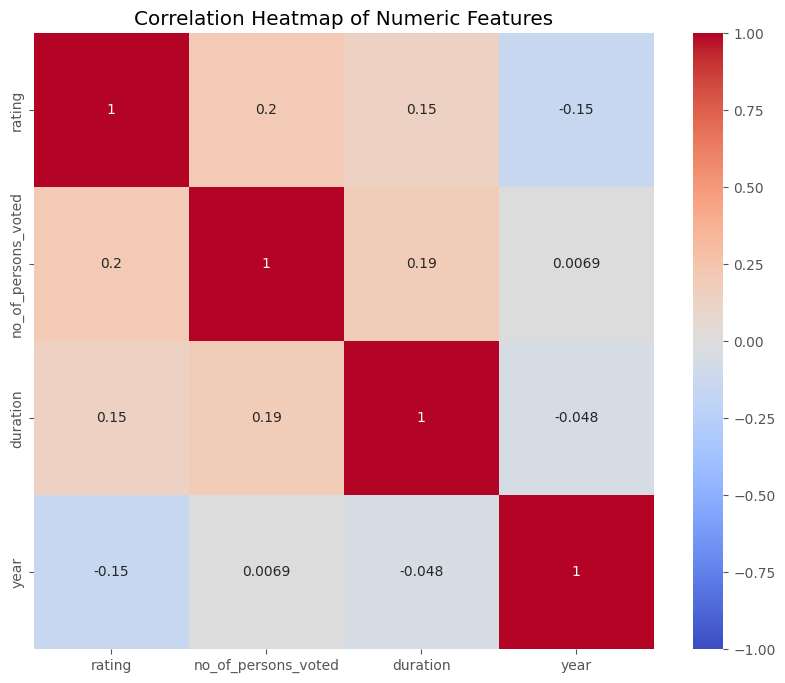

In [90]:
# Select numeric columns for correlation analysis
numeric_columns = ['rating', 'no_of_persons_voted', 'duration', 'year']
correlation_matrix = df_clean[numeric_columns].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

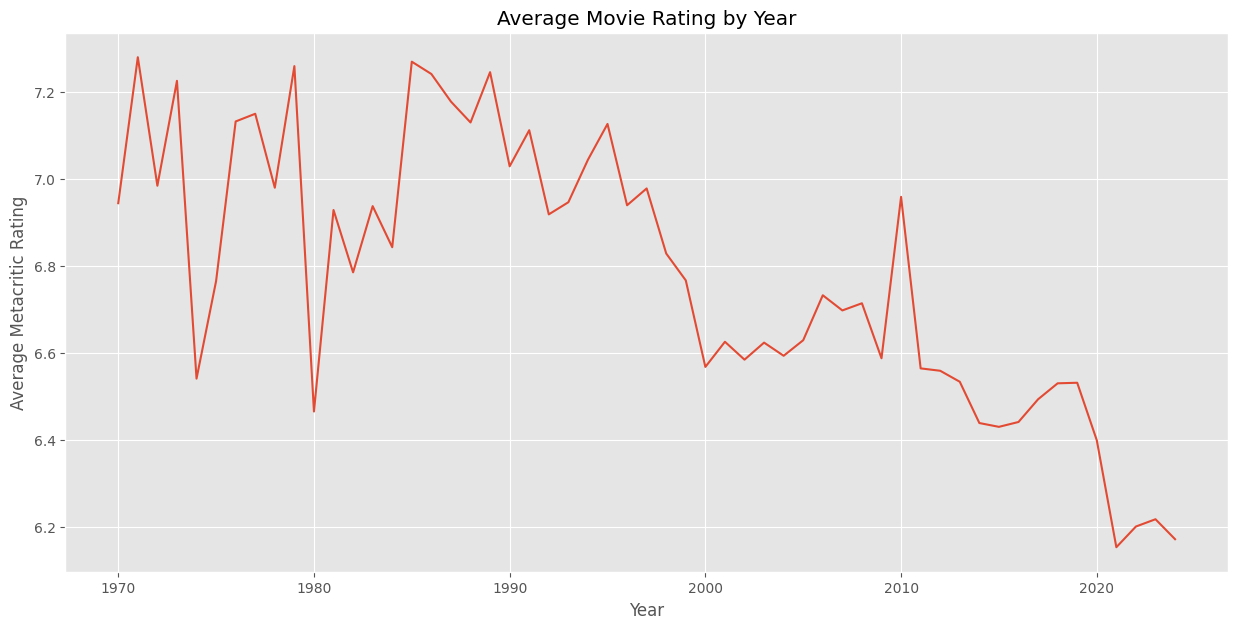

In [92]:
# Calculate average rating per year
yearly_ratings = df_clean.groupby('year')['rating'].mean()

plt.figure(figsize=(15, 7))
sns.lineplot(x=yearly_ratings.index, y=yearly_ratings.values)
plt.title('Average Movie Rating by Year')
plt.xlabel('Year')
plt.ylabel('Average Metacritic Rating')
plt.show()

In [93]:
print(f"The dataset contains {df.shape[0]} movies spanning from {df['year'].min()} to {df['year'].max()}.")
print(f"The average Metacritic rating across all movies is {df['rating'].mean():.2f}.")
print(f"The longest movie in the dataset is {df['duration'].max():.2f} hours long.")
print(f"The most common genre is {genres_exploded['genres'].value_counts().index[0]}.")
print(f"The director with the most movies in the dataset is {director_counts.index[0]} with {director_counts.values[0]} movies.")
print(f"The year with the most movie releases was {movies_per_year.idxmax()} with {movies_per_year.max()} movies.")
print(f"The highest-rated movie in the dataset is '{df.loc[df['rating'].idxmax(), 'title']}' with a rating of {df['rating'].max()}.")
print(f"The average movie duration is {df_clean['duration'].mean():.2f} hours.")
print(f"The correlation between movie duration and rating is {correlation:.2f}.")
print(f"The writer with the highest average rating (minimum 5 movies) is {top_writer_ratings.index[0]} with an average rating of {top_writer_ratings.values[0]:.2f}.")
print(f"The most voted movie is '{df.loc[df['no_of_persons_voted'].idxmax(), 'title']}' with {df['no_of_persons_voted'].max()} votes.")
print(f"The average number of persons who voted per movie is {df['no_of_persons_voted'].mean():.0f}.")
print(f"The year with the highest average rating was {yearly_ratings.idxmax()} with an average rating of {yearly_ratings.max():.2f}.")
print(f"The genre that has grown most in popularity since 2000 is {genre_pivot_top.loc[2000:].diff().sum().idxmax()}.")
print(f"The range of ratings is from {df['rating'].min()} to {df['rating'].max()}.")
print(f"The percentage of movies with a rating of 7.5 or above (equivalent to 75 on a 100-point scale) is {(df['rating'] >= 7.5).mean() * 100:.2f}%.")
print(f"The highest-rated movie in the dataset has a score of {df['rating'].max():.1f} out of 10.")
print(f"Half of all movies have a rating of {df['rating'].median():.1f} or higher.")
print(f"The most common rating range is between {df['rating'].value_counts(bins=10).index[0].left:.2f} and {df['rating'].value_counts(bins=10).index[0].right:.2f}, which includes {df['rating'].value_counts(normalize=True, bins=10).iloc[0]*100:.2f}% of all movies.")
print(f"Only {(df['rating'] < 4).mean() * 100:.2f}% of movies have a rating below 4 out of 10.")
print(f"The top 10% of movies have a rating of {df['rating'].quantile(0.9):.1f} or higher.")
print(f"The standard deviation of ratings is {df['rating'].std():.2f}, indicating the spread of ratings around the mean.")
print(f"The interquartile range of ratings (difference between 75th and 25th percentiles) is {df['rating'].quantile(0.75) - df['rating'].quantile(0.25):.2f}, showing the spread of the middle 50% of ratings.")
print(f"The percentage of movies with an 'excellent' rating (8 or above) is {(df['rating'] >= 8).mean() * 100:.2f}%.")
print(f"The year with the highest number of movie releases was {movies_per_year.idxmax()} with {movies_per_year.max()} movies.")
duration_trend = df_clean.groupby('year')['duration'].mean()
trend_correlation = duration_trend.corr(pd.Series(duration_trend.index, index=duration_trend.index))
print(f"The average movie duration has {'increased' if trend_correlation > 0 else 'decreased'} over time. (Correlation: {trend_correlation:.2f})")
print(f"The genre with the highest average rating is {genres_exploded.groupby('genres')['rating'].mean().nlargest(1).index[0]} with an average rating of {genres_exploded.groupby('genres')['rating'].mean().nlargest(1).values[0]:.2f}.")
print(f"The decade with the highest average rating was {(df_clean['year'] // 10 * 10).astype(int).map(df_clean.groupby(df_clean['year'] // 10 * 10)['rating'].mean()).idxmax()}s.")
print(f"The most prolific year for the top director ({director_counts.index[0]}) was {directors_exploded[directors_exploded['directed_by'] == director_counts.index[0]]['year'].value_counts().index[0]}.")
print(f"The correlation between a movie's rating and the number of votes it received is {df_clean['rating'].corr(df_clean['no_of_persons_voted']):.2f}.")
print(f"The percentage of movies longer than 2.5 hours is {(df_clean['duration'] > 2.5).mean() * 100:.2f}%.")
print(f"The writer with the most consistent ratings (lowest standard deviation, minimum 5 movies) is {writer_ratings.loc[top_writers].groupby('written_by').std().nsmallest(1).index[0]}.")
print(f"The year with the most diverse genre representation (highest number of unique genres) was {genres_exploded.groupby('year')['genres'].nunique().idxmax()}.")
print(f"The average rating for movies has {'increased' if yearly_ratings.corr(pd.Series(yearly_ratings.index, index=yearly_ratings.index)) > 0 else 'decreased'} over time.")
print(f"The genre that has shown the most growth in the last decade is {genre_pivot_top.iloc[-10:].sum().idxmax()}.")
print(f"The month with the highest average movie rating is {df_clean.groupby(df_clean['release_date'].dt.month)['rating'].mean().idxmax()}.")

The dataset contains 16290 movies spanning from 1970 to 2024.
The average Metacritic rating across all movies is 6.62.
The longest movie in the dataset is 13.47 hours long.
The most common genre is Drama.
The director with the most movies in the dataset is Woody Allen with 50 movies.
The year with the most movie releases was 2014 with 707 movies.
The highest-rated movie in the dataset is 'A Hole in My Heart' with a rating of 10.0.
The average movie duration is 1.73 hours.
The correlation between movie duration and rating is 0.15.
The writer with the highest average rating (minimum 5 movies) is  Frank Wedekind with an average rating of 9.60.
The most voted movie is 'The Incredible Hulk' with 996.0 votes.
The average number of persons who voted per movie is 96.
The year with the highest average rating was 1971 with an average rating of 7.28.
The genre that has grown most in popularity since 2000 is Thriller.
The range of ratings is from 0.3 to 10.0.
The percentage of movies with a rating